In [5]:
import numpy as np

# Derivadas parciales para regresión lineal
# ####################################################################
def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1."""
    # coeficiente del término independiente
    c_ind = sum(ys)
    # coeficiente del parámetro 1
    c_1 = sum(xs)
    # coeficiente del parámetro 0
    c_0 = len(xs)
    return (c_1, c_0, c_ind)

def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0."""
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi * yi
        # coeficiente del parámetro 1
        c_1 += xi * xi
        # coeficiente del parámetro 0
        c_0 += xi
    return (c_1, c_0, c_ind)

# --- CORRECCION ---
def ajustar_min_cuadrados(xs, ys, grado=1):
    """
    Ajusta un polinomio de grado 'grado' a los datos.
    Si no se especifica grado, usa 1 (lineal) por defecto.
    """
    coefs = np.polyfit(xs, ys, grado)
    
    # Creamos la función polinomio lista para usarse
    polinomio = np.poly1d(coefs)
    
    return coefs, polinomio

Polinomio coefs: [-3.15029410e-04 -2.73089683e-02 -2.35777604e+00 -6.64323384e+01
 -2.53679645e+02]
Error Relativo Promedio: 0.008959
Error Relativo Máximo: 0.027768


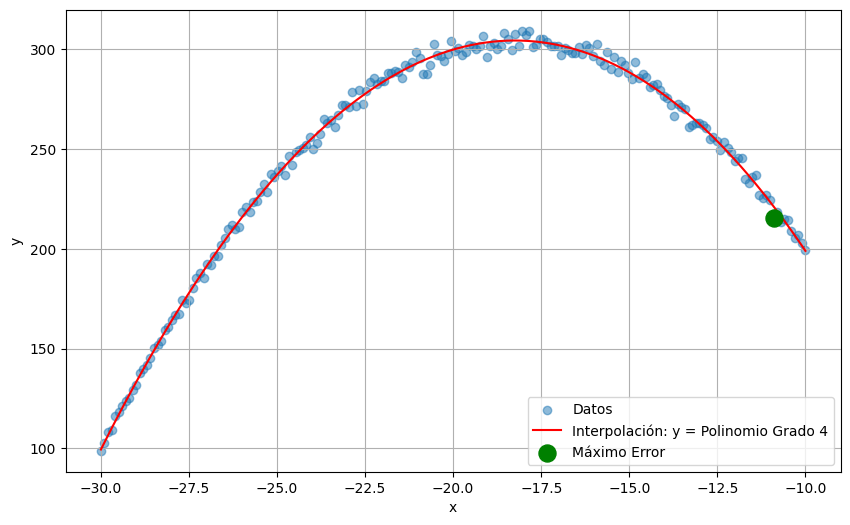

In [6]:
import re
import numpy as np
import matplotlib.pyplot as plt

# --- Datos ---
datos_crudos = """
(-19.849, 300.682), (-29.698, 109.399), (-18.04, 309.383), (-20.754, 287.79), (-13.216, 262.128), 
(-23.367, 261.066), (-24.874, 241.597), (-18.844, 303.051), (-14.724, 285.93), (-25.477, 228.369), 
(-25.075, 236.165), (-22.06, 284.392), (-10.302, 205.234), (-20.854, 287.813), (-10.503, 214.57), 
(-19.648, 298.733), (-12.312, 253.532), (-21.859, 287.969), (-10.603, 214.864), (-14.925, 285.108), 
(-14.322, 282.151), (-15.126, 291.951), (-22.462, 279.406), (-16.03, 296.948), (-19.95, 299.401), 
(-16.131, 300.917), (-18.945, 301.778), (-26.281, 211.784), (-18.442, 305.058), (-15.025, 288.366), 
(-10.201, 207.134), (-25.176, 237.482), (-13.518, 271.179), (-29.497, 118.383), (-27.286, 185.304), 
(-21.658, 289.344), (-15.327, 288.652), (-23.065, 272.186), (-28.693, 142.073), (-19.146, 306.702), 
(-17.739, 300.977), (-12.814, 260.814), (-26.382, 209.756), (-23.166, 272.194), (-14.824, 293.648), 
(-24.271, 250.622), (-20.251, 293.963), (-19.749, 297.446), (-14.623, 287.544), (-22.663, 279.58), 
(-22.261, 285.889), (-20.452, 296.984), (-10.402, 209.147), (-13.116, 263.333), (-22.563, 272.813), 
(-11.307, 226.847), (-25.678, 223.68), (-11.809, 245.787), (-12.714, 255.12), (-18.744, 300.035), 
(-13.317, 260.956), (-11.407, 236.865), (-25.578, 223.838), (-18.342, 299.782), (-17.538, 305.318), 
(-24.472, 248.435), (-19.045, 296.226), (-18.543, 308.121), (-13.618, 272.847), (-13.719, 266.499), 
(-20.352, 296.48), (-24.673, 246.398), (-30.0, 98.855), (-28.995, 131.82), (-24.171, 252.325), 
(-20.553, 302.85), (-11.91, 245.391), (-28.09, 160.715), (-26.08, 211.185), (-10.0, 199.612), 
(-11.608, 233.251), (-22.864, 278.807), (-23.869, 253.259), (-20.151, 297.536), (-18.141, 301.492), 
(-14.121, 279.75), (-17.236, 301.574), (-17.035, 301.841), (-26.482, 205.542), (-13.015, 263.34), 
(-28.593, 145.435), (-12.01, 244.165), (-17.638, 302.421), (-13.819, 272.136), (-29.095, 129.284), 
(-12.111, 248.809), (-21.457, 285.51), (-25.276, 228.711), (-27.99, 164.503), (-27.588, 173.008), 
(-20.955, 295.952), (-15.93, 302.948), (-17.337, 303.511), (-24.07, 256.152), (-24.774, 237.062), 
(-15.729, 292.451), (-25.779, 218.657), (-21.055, 298.79), (-16.834, 300.864), (-19.246, 301.543), 
(-17.437, 305.138), (-27.487, 174.301), (-21.156, 293.614), (-12.613, 256.253), (-22.965, 271.269), 
(-21.558, 288.815), (-21.759, 288.01), (-12.915, 262.334), (-25.879, 221.177), (-17.136, 301.852), 
(-15.628, 298.586), (-24.975, 239.195), (-26.683, 196.542), (-26.181, 209.745), (-26.583, 202.039), 
(-27.387, 180.44), (-15.829, 293.986), (-10.804, 218.757), (-25.98, 218.385), (-11.508, 235.877), 
(-16.935, 297.12), (-10.101, 203.075), (-28.291, 153.717), (-12.211, 250.583), (-15.528, 290.423), 
(-10.905, 215.36), (-10.704, 213.679), (-15.427, 296.216), (-18.241, 307.861), (-13.92, 275.744), 
(-22.362, 283.676), (-28.392, 151.994), (-28.492, 150.448), (-14.523, 286.426), (-28.894, 137.853), 
(-27.085, 185.381), (-12.513, 254.25), (-16.332, 297.928), (-11.206, 225.713), (-16.633, 298.374), 
(-23.467, 264.854), (-29.799, 108.138), (-23.568, 263.082), (-19.548, 302.165), (-11.005, 224.618), 
(-26.884, 191.864), (-16.533, 298.192), (-19.447, 301.635), (-17.839, 309.26), (-19.347, 300.233), 
(-18.643, 301.76), (-11.106, 226.909), (-21.357, 291.985), (-17.94, 307.196), (-27.186, 188.047), 
(-28.794, 140.068), (-27.688, 174.619), (-26.985, 192.334), (-27.789, 167.401), (-11.709, 234.86), 
(-16.432, 301.082), (-14.422, 281.013), (-20.05, 304.052), (-29.899, 102.537), (-12.412, 249.41), 
(-23.266, 266.892), (-24.372, 249.634), (-29.598, 116.364), (-16.734, 299.557), (-14.02, 276.686), 
(-21.256, 291.0), (-15.226, 294.343), (-29.397, 121.272), (-20.653, 291.969), (-13.417, 270.013), 
(-27.889, 166.695), (-22.161, 282.435), (-14.221, 282.807), (-23.97, 250.263), (-22.764, 271.703), 
(-24.573, 241.859), (-29.196, 125.348), (-26.784, 196.418), (-29.296, 123.603), (-21.96, 284.002), 
(-16.231, 302.162), (-23.769, 257.683), (-23.668, 265.16), (-25.377, 232.684), (-28.191, 159.483)
"""
points = re.findall(r"\((-?\d+\.\d+), (-?\d+\.\d+)\)", datos_crudos)
xs = np.array([float(p[0]) for p in points])
ys = np.array([float(p[1]) for p in points])


# Reemplace con la función obtenida de ajustar_min_cuadrados
coefs, interpolacion = ajustar_min_cuadrados(xs, ys, grado=4)
# --- Función de ejemplo

# Cálculo de errores 
y_pred = interpolacion(xs)
errores = np.abs((ys - y_pred) / ys)
e_promedio = np.mean(errores)
e_maximo = np.max(errores)
idx_max = np.argmax(errores)
punto_max = (xs[idx_max], ys[idx_max])

print(f"Polinomio coefs: {coefs}")
print(f"Error Relativo Promedio: {e_promedio:.6f}")
print(f"Error Relativo Máximo: {e_maximo:.6f}")


# Dibujar los puntos x, y
plt.figure(figsize=(10,6))
plt.scatter(xs, ys, alpha=0.5, label="Datos")

# Dibujar la función de interpolación
x_aprox = np.linspace(min(xs), max(xs), 100)
y_aprox = interpolacion(x_aprox) 

plt.plot(x_aprox, y_aprox, "r-", label="Interpolación: y = Polinomio Grado 4")
plt.scatter([punto_max[0]], [punto_max[1]], color="green", s=150, zorder=5, label="Máximo Error")

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

In [2]:
from src import ajustar_min_cuadrados

# UTILICE:
# ajustar_min_cuadrados()

[01-30 13:25:00][INFO][Chris] 2026-01-30 13:25:00.283158
[01-30 13:25:00][INFO][Chris] 2026-01-30 13:25:00.293060
[01-30 13:25:00][INFO][Chris] 2026-01-30 13:25:00.300122


In [3]:
# Reemplace con el conjunto de datos dado
# --- Datos de ejemplo
xs = [0, 20, 40, 60, 80, 100]
ys = [300, 400, 500, 600, 700, 800]

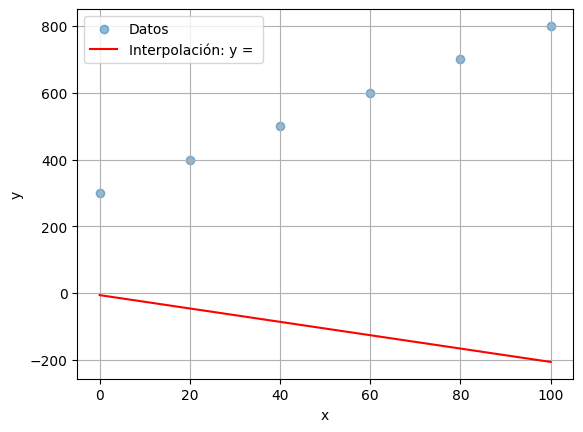

In [ ]:
# Reemplace con la función obtenida de ajustar_min_cuadrados
interpolacion = lambda x: -2 * x - 6
# --- Función de ejemplo

import matplotlib.pyplot as plt
import numpy as np

# Dibujar los puntos x, y
plt.scatter(xs, ys, alpha=0.5, label="Datos")

# Dibujar la función de aproximación
x_aprox = np.linspace(min(xs), max(xs), 100)
y_aprox = [interpolacion(xi) for xi in x_aprox]
plt.plot(x_aprox, y_aprox, "r-", label="Interpolación: y = ")

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()